# TSIA202a - Second Practice Session : Spectral density estimation and periodogram
The goal of this second session is to provide a power spectral density estimator of a real, zero-mean, weakly stationary process $X_t$. We suppose that we have access to $n$ observations and we will use the FFT algorithm (that implements the DFT) using `numpy.fft.module`.
Recall (from the course) that the periodogram of the observations $X_0, \dots, X_{n-1}$ can be given as:
$$
I_n(\lambda) = \frac{1}{2\pi n}|\sum_{k=0}^{n-1} X_k e^{i\lambda k}|^2
$$

Moreover, the Hertglotz theorem provides a relation between the empirical autocovariance $\hat{\gamma}_n$ and the periodogram $I_n$:
$$
\hat{\gamma}_n(k) = \int_{0}^{2\pi}e^{i\lambda k}I_n({\lambda})d\lambda
$$

1. For a given $m \geq n$  we denote also the DFT as:
$$
DFT(X,m)(k) = \sum_{h=0}^{n-1}X_he^{-2i\pi\frac{kh}{m}}
$$
Show the following relation: 
$$I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi n} |DFT(X,m)(k)|^2$$
2. provide a script that compute those $I_n(\frac{2\pi k}{m})$ for the time series mentioned in the first practice session
3. Show that $I_n(\lambda) = \frac{1}{2\pi} \sum_{k=0}^{n-1} \hat{\gamma}_n(k)e^{-i\lambda k}$
4. How to choose $m$ in order to get a simple relation between $\hat{\gamma}_n(k)$ and $I_n(\frac{2\pi k}{m})$ ? At the end, given a specific $\tilde{m}$ show that:
$$
\hat{\gamma}_n(k) = \frac{1}{n} IDFT\left(\left|DFT(X, \tilde{m})\right|^2, \tilde{m}\right)(k)
$$ Try this estimator on the autocovariance of previous time series of the first session.

5. In the case of white noise, estimate the variance of the periodogram for several values of $n$ and discuss about it.




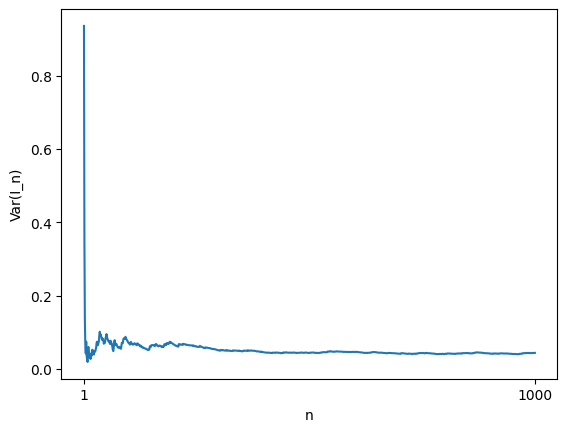

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#Q2
def I(X,k,m):
    n = len(X[0])
    f = np.fft.fft(X,m)
    return 1/(2*np.pi*n)*abs(f[k])**2


#Q5
mu,sigma = 0,1
N = 1000 # nombre d'echantillons max de X
X=np.random.normal(mu,sigma,N)


def s(l,n,X):
    p = np.zeros(N, dtype= 'complex_')
    for i in range(n):
        p[i] += np.exp(1j*l*i)
    s = np.array(p)*X
    s = np.sum(s)
    return abs(s)

I=[[1/(2*np.pi*(n))*s(l,n,X)**2 for l in range(N) ] for n in range(1,N+1)]#chaque ligne est un I_n(l) pour l de 0 à N-1 et on augmente n de 1 à chaque ligne, pour aller de 1 à N

def plot5(I):
    x = range(1,N+1)
    y = [1/(i)*(np.fft.ifft(abs(np.fft.fft(I[i-1],i))**2,i)[0]) for i in range(1,N+1)]
    plt.clf()
    plt.plot(x,y)
    plt.xlabel('n')
    plt.xticks([1,1000])
    plt.ylabel('Var(I_n)')
    plt.show()

plot5(I)



The periodofram is an estimation of the spectral density of a signal. A white noise has a constant spectral density and as n goes to infinity the periodogram with n terms converges towards the spectral density. Since the variance of the periodogram goes to 0 as n goes to infinity it means that the periodogram is becoming closer and closer to a constant function of $\lambda$. This confirms the previous result: the spectral density of a white noise is indeed constant.